Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# Project PETROBRAS (2018/00147-5): <br><br> Atenuação de cargas dinâmicas em <br> linhas de ancoragem imersas em argila

---

##  Teste preliminar do setup experimental em <br> Gaspar, SC, em 08 de maio de 2020

_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Dr. David Eduardo Lourenço_ 

Porto Alegre, RS, Brazil 

[1.   Introdução](#section_1)  
[2.   Leitura e preparação dos dados](#section_2)  
[3.   Gráficos no tempo](#section_3)  
[4.   Gráficos de atenuação](#section_4)  
[5.   Recomendações para os ensaios](#section_5)  
[6.   Registro fotográfico](#section_6)  


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from MRPy import MRPy

# Suppress deprecation warning (plot hold on)
import warnings
warnings.filterwarnings('ignore')


## 1. Introdução <a name="section_1"></a> 


## 2. Leitura e preparação dos dados <a name="section_2"></a> 


In [115]:
file = ('E006F01.TXT',        # início dos registros   
        'E009F01.TXT',        # cravação do segundo segmento
        'E009F02.TXT',        # cravação do terceiro segmento
        'E009F03.TXT',        # carregamento ...
        'E009F04.TXT',        # ...
        'E009F05.TXT',        # ...
        'E009F06.TXT',        # ...
        'E009F07.TXT',        # ...
        'E009F08.TXT',        # ... final carregamento
        'E009F09.TXT',        # início do alívio da corrente
        'E009F10.TXT',        # final do alívio da corrente
        'E009F11.TXT')        # torpedo extraído, célula 2 na mesa

nfiles = len(file)

# note: adxl203 output through 2/3 voltage divider

B0     = np.array([0.000,  13340,    8060,     13540,    7970    ])
cte    = np.array([0.001, -0.000195, 0.00226, -0.000196, 0.00223])

datalist = []

for k in range(nfiles):

    raw  = np.genfromtxt('Files/'+file[k], delimiter=',')    
    if (k == 0): raw[:,0] -= 60000 # accidental reset after first record (zero)
        
    for j in range(5):
        raw[:,j] = cte[j]*(raw[:,j] - B0[j])           # scale setting

        if ((j == 1) | (j==3)):
            
            kneg = (raw[:,j] < -1);  raw[kneg, j] = -2 - raw[kneg, j]
            kpos = (raw[:,j] >  1);  raw[kpos, j] =  2 - raw[kpos, j]
            
            raw[:,j] = 180*np.arcsin(raw[:,j])/np.pi  # degrees conversion

    datalist.append(raw)
#   print('{0:6.0f}s'.format(datalist[k][0,0]))

t0 =  datalist[1][0,0]


### 3. Gráficos nos tempo

#### 3.1 Células de carga

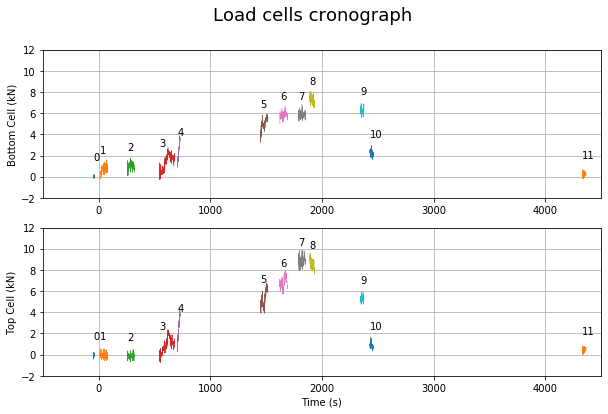

In [93]:
plt.figure(1, figsize=(10,6))
tx = plt.suptitle('Load cells cronograph', fontsize=18)

for k in range(nfiles):
    
    data =  datalist[k]
    t    =  data[:,0]
    fs   =  len(t)/(t[-1] - t[0])
    t0k  =  t[0]
    
    C1   =  data[:,2]
    C1   =  MRPy(C1, fs).mov_average(n=11)
    
    C2   =  data[:,4]
    C2   =  MRPy(C2, fs).mov_average(n=11)

    plt.subplot(2,1,1)
    ax1 = plt.plot(t0k+C1.t_axis(), C1[0], lw=0.5, label=str(2*k))
    tx1 = plt.text(t0k+C1.t_axis()[0], 1.5+C1[0].mean(), str(k))
    plt.subplot(2,1,2)
    ax2 = plt.plot(t0k+C2.t_axis(), C2[0], lw=0.5, label=str(2*k + 1))
    tx2 = plt.text(t0k+C1.t_axis()[0], 1.5+C2[0].mean(), str(k))

plt.subplot(2,1,1)
plt.axis([-500, 4500, -2, 12])
plt.ylabel('Bottom Cell (kN)')
plt.grid('True')

plt.subplot(2,1,2)
plt.axis([-500, 4500, -2, 12])
plt.xlabel('Time (s)')
plt.ylabel('Top Cell (kN)')
plt.grid('True')

plt.savefig('LoadCells_cronometer'+'.png', 
             format='png', dpi=300, bbox_inches='tight')


#### 3.2. Inclinômetros

79.31069362937264 -1.0351990781234348
83.86986086826542 -7.323381884323807
83.5707267910054 0.832460256724234
84.80179972347378 26.403554472365247
85.41634300065452 30.377383232401392
83.21217151721635 31.522576563648347
83.32571735255092 31.574901614826278
85.21329970842689 31.34414098983198
75.33079335386907 32.87221531866142
75.23068203542071 32.55020091534129
85.22409134094553 26.894139416320968
40.003354130139776 -8.717708489510441


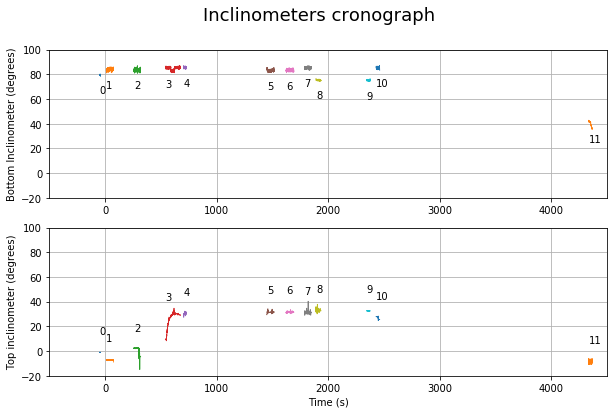

In [116]:
plt.figure(2, figsize=(10,6))
tx = plt.suptitle('Inclinometers cronograph', fontsize=18)

for k in range(nfiles):
    
    data =  datalist[k]
    t    =  data[:,0]
    fs   =  len(t)/(t[-1] - t[0])
    t0k  =  t[0]
    
    S1   =  data[:,1]
    S1   =  MRPy(S1, fs).mov_average(n=11)
    
    S2   =  data[:,3]
    S2   =  MRPy(S2, fs).mov_average(n=11)

    print(S1.mean(), S2.mean())

    plt.subplot(2,1,1)
    ax1 = plt.plot(t0k+S1.t_axis(), S1[0], lw=0.8, label=str(2*k))
    tx1 = plt.text(t0k+S1.t_axis()[0], -15+S1[0].mean(), str(k))
    plt.subplot(2,1,2)
    ax2 = plt.plot(t0k+S2.t_axis(), S2[0], lw=0.8, label=str(2*k + 1))
    tx2 = plt.text(t0k+S2.t_axis()[0],  15+S2[0].mean(), str(k))

plt.subplot(2,1,1)
plt.axis([-500, 4500, -20, 100])
plt.ylabel('Bottom Inclinometer (degrees)')
plt.grid('True')

plt.subplot(2,1,2)
plt.axis([-500, 4500, -20, 100])
plt.xlabel('Time (s)')
plt.ylabel('Top inclinometer (degrees)')
plt.grid('True')

plt.savefig('Inclinometers_cronometer'+'.png', 
             format='png', dpi=300, bbox_inches='tight')


### 4. Gráficos de atenuação

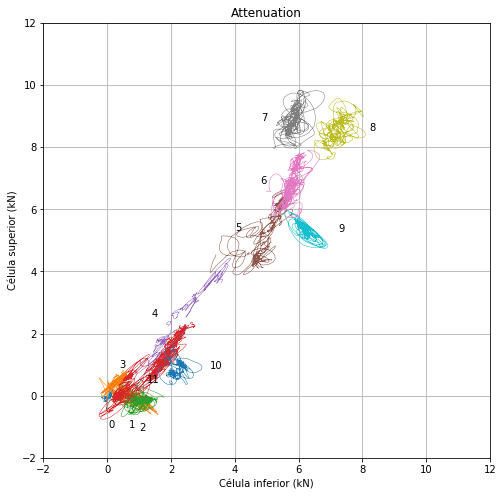

In [121]:
plt.figure(3, figsize=(8,8))

for k in  range(nfiles):
    
    data =  datalist[k]
    t    =  data[:,0]
    fs   =  len(t)/(t[-1] - t[0])
    t0k  =  t[0]
    
    C1   =  data[:,2]
    C1   =  MRPy(C1, fs).mov_average(n=11)
    
    C2   =  data[:,4]
    C2   =  MRPy(C2, fs).mov_average(n=11)

    f3   = plt.plot(C1[0], C2[0], lw=0.5)
    
    if (k < 3):
        tx   = plt.text(C1[0].mean(),   C2[0].mean()-1, str(k))
    elif (k < 8):
        tx   = plt.text(C1[0].mean()-1, C2[0].mean(),   str(k))
    else:
        tx   = plt.text(C1[0].mean()+1, C2[0].mean(),   str(k))

    plt.axis((-2, 12, -2, 12), 'equal')
    plt.grid('True')
    plt.title('Attenuation')
    plt.xlabel('Célula inferior (kN)')
    plt.ylabel('Célula superior (kN)')
    
    plt.savefig('Attenuation'+'{0:>02}'.format(k)+'.png', 
                 format='png', dpi=300, bbox_inches='tight')


## 3. Gráficos com resultados <a name="section_3"></a> 


In [6]:

# <img src="resources/Catenary_context.png" alt="Catenary context" width="640">


## 4. Recomendações para os ensaios <a name="section_4"></a> 


## 5. Registro fotográfico<a name="section_5"></a> 
